In [1]:
import numpy as np
import pandas as pd
import os
import nltk

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#nltk.download()

In [4]:
data=pd.read_csv(r"C:\Users\harshit\Downloads\classification\NLP\spam.csv", encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
mssg=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],1)
mssg.columns=['label','message']
mssg.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis (EDA)

In [6]:
mssg.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
mssg.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [8]:
# make a new column to detect how long the text messages are.

mssg['length']=mssg['message'].apply(len)
mssg.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Data Visualisation.

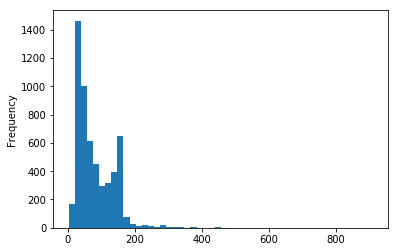

In [9]:
mssg['length'].plot(kind='hist', bins=50)

In [10]:
mssg['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [11]:
mssg[mssg.length==910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000008D188F668>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000008D19A05F8>], dtype=object)

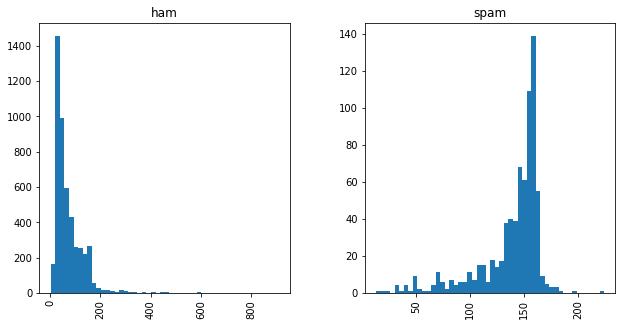

In [16]:
# see if message length is a distinguishing feature between ham and spam

mssg.hist(column='length', by='label',bins=50,figsize=(10,5))

In [19]:
import string
from nltk.corpus import stopwords

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harshit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number.

In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

In [ ]:
#  let's write a function that will split a message into its individual words and return a list. 
# We'll also remove very common words, ('the', 'a', etc..).

def text_process(text):
    
    #Takes in a string of text, then performs the following:
    #1. Remove all punctuation
    #2. Remove all stopwords
    #3. Returns a list of the cleaned text
    
    nopunc=[char for char in text if char not in string.punctuation]  # Check characters to see if they are in punctuation.
    nopunc=''.join(nopunc)  # Join the characters again to form the string.
    
    # Now just remove any stopwords.
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [24]:
# we can just use apply() in pandas do process all the text in the DataFrame.
mssg['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [26]:
# This model will convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(mssg['message'])
len(bow_transformer.vocabulary_)

11304

In [31]:
# Now we can use .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages.

message_bow=bow_transformer.transform(mssg['message'])

In [35]:
message_bow

[<5572x11304 sparse matrix of type '<class 'numpy.int64'>'
 	with 50193 stored elements in Compressed Sparse Row format>]

In [39]:
message_bow.shape,message_bow.nnz

((5572, 11304), 50193)

In [40]:
sparsity = (100.0 * message_bow.nnz / (message_bow.shape[0] * message_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining.
TF: Term Frequency, which measures how frequently a term occurs in a document.
TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important.Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf=TfidfTransformer().fit(message_bow)
mssg_tfidf=tfidf.transform(message_bow)

In [43]:
mssg_tfidf.shape

(5572, 11304)

In [47]:
x=mssg.message
y=mssg.label

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [52]:
from sklearn.naive_bayes import MultinomialNB

We will use SciKit Learn's pipeline capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use.

In [50]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('bow', CountVectorizer(analyzer=text_process)),('tfidf', TfidfTransformer()),('classifier', MultinomialNB())])

In [51]:
pipeline.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x00000008D1D9AD90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [53]:
label_predicted=pipeline.predict(x_test)
label_predicted

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], 
      dtype='<U4')

In [54]:
pipeline.score(x_test,y_test)

0.95426008968609866

In [55]:
from sklearn import metrics
confusion_mtrx=metrics.confusion_matrix(y_test,label_predicted)
confusion_mtrx

array([[949,   0],
       [ 51, 115]], dtype=int64)

In [56]:
metrics.accuracy_score(y_test,label_predicted)

0.95426008968609866

In [44]:
# prediction on entire data set.

from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
spam_model=mnb.fit(mssg_tfidf,mssg.label)

In [45]:
predicted_label=spam_model.predict(mssg_tfidf)
predicted_label

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], 
      dtype='<U4')